# **Practical Application III: Comparing Classifiers**

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### **Getting Started**

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### **Problem 1: Understanding the Data**

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### **Solution 1**
- The data represents 17 marketing campaigns

### **Problem 2: Read in the Data**

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE

In [4]:
#bank = pd.read_csv('bank/bank.csv', sep=';')
bank = pd.read_csv('data/bank-additional-full.csv', sep=';')

In [5]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Display the dataset information**

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [386]:
#bank = pd.read_csv('bank/bank.csv', sep=';')

In [7]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
#X = bank[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
#y = np.where(bank.y == 'yes', 1, 0)

**Select the columns to use**

In [9]:
XX = bank[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'y']]
X = XX.drop(['y'], axis=1)
y = np.where(XX.y == 'yes', 1, 0)


**Encode the columms where needed**

In [10]:
le = LabelEncoder()

In [11]:
X.job = le.fit_transform(X.job)
X.marital = le.fit_transform(X.marital)
X.education = le.fit_transform(X.education)
X.default = le.fit_transform(X.default)
X.housing = le.fit_transform(X.housing)
X.loan = le.fit_transform(X.loan)

**Create the correlation matrix**

In [12]:
X.corr()

,age,job,marital,education,default,housing,loan
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000


**Use SMOTE to handle imbalanced classes**

In [13]:
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.20)

In [15]:
X_train.head(2)

,age,job,marital,education,default,housing,loan
14543,35,7,1,3,0,2,0
56260,35,7,1,3,0,2,0


### **Explore: Logistic Regression Classifier**

In [16]:
start = time.time()
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)
stop = time.time()
logreg_train_time = stop - start

**Get the Train and Test MSEs**

In [17]:
train_preds = logreg.predict(X_train)
test_preds = logreg.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,test_preds))

test_mse = mean_squared_error(test_preds, y_test)
train_mse = mean_squared_error(train_preds, y_train)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.69      0.34      0.46      7332
           1       0.56      0.85      0.67      7288

    accuracy                           0.59     14620
   macro avg       0.63      0.59      0.57     14620
weighted avg       0.63      0.59      0.57     14620

Train MSE: 0.40308844654217113
Test MSE: 0.407250341997264


In [18]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Plot the confusion matrix**

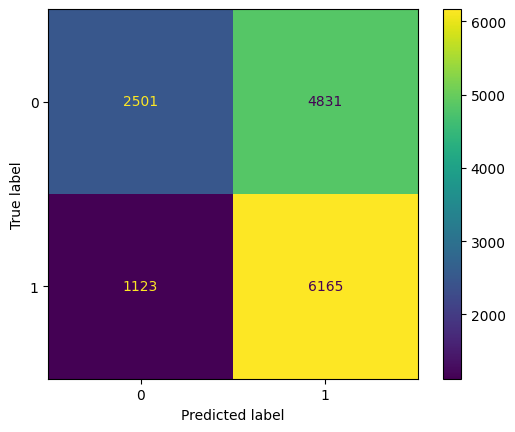

In [30]:
# plot_confusion_matrix(logreg,X_test,y_test)
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test)

In [39]:
logreg_tp = 6165
logreg_tn = 2501
logreg_fp = 4831
logreg_fn = 1123

In [40]:
logistic_score_test = logreg.score(X_test, y_test)
print("{:.3f}".format(logistic_score_test*100))
logistic_score_test

59.275


0.5927496580027359

**Get the accuracy, precision, recall and specificity**

In [41]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
solvers = ['lbfgs']

penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)

logreg_grid = GridSearchCV(logreg, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
logreg_cv_res = logreg_grid.cv_results_

logreg_mean_fit_time = logreg_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", logreg_mean_fit_time)

logreg_grid_score_train = logreg_grid.score(X_train, y_train)
logreg_grid_score_test = logreg_grid.score(X_test, y_test)
print("LogReg Train Score:", logreg_grid_score_train)
print("LogReg Test Score:", logreg_grid_score_test)
print(" ")

logreg_acc = (logreg_tp+logreg_tn)/(logreg_tp+logreg_tn+logreg_fp+logreg_fn)*100
logreg_pre = (logreg_tp)/(logreg_tp+logreg_fp)*100
logreg_rec = (logreg_tp)/(logreg_tp+logreg_fn)*100
logreg_spe = (logreg_tn)/(logreg_tn+logreg_fp)*100

print("Accuracy = \t", "{:.10f}".format(logreg_acc))
print("Precision = \t", "{:.10f}".format(logreg_pre))
print("Recall = \t", "{:.10f}".format(logreg_rec))
print("Specificity = \t", "{:.10f}".format(logreg_spe))
print(" ")
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Mean Fit Time:  0.04187564849853516
LogReg Train Score: 0.5971338668855599
LogReg Test Score: 0.5910396716826265
 
Accuracy = 	 59.2749658003
Precision = 	 56.0658421244
Recall = 	 84.5911086718
Specificity = 	 34.1107474086
 
Train MSE: 0.40308844654217113
Test MSE: 0.407250341997264


**Explore the feature importance using permutation importance**

In [42]:
from sklearn.inspection import permutation_importance
r = permutation_importance(logreg_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.078906
6,loan,0.009938
3,education,0.007934
0,age,0.005000
2,marital,0.002640
1,job,0.001676
5,housing,-0.001689


### **Explore: Decision Tree Classifier**

In [43]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()
dtree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
stop = time.time()
dtree_train_time = stop - start

**Get the Train and Test MSEs**

In [44]:
dtree_train_preds = dtree.predict(X_train)
dtree_test_preds = dtree.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,dtree_test_preds))


dtree_test_mse = mean_squared_error(dtree_test_preds, y_test)
dtree_train_mse = mean_squared_error(dtree_train_preds, y_train)

print("DTree Train MSE:", dtree_train_mse)
print("DTree Test MSE:", dtree_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.80      0.70      0.74      7332
           1       0.73      0.82      0.77      7288

    accuracy                           0.76     14620
   macro avg       0.76      0.76      0.76     14620
weighted avg       0.76      0.76      0.76     14620

DTree Train MSE: 0.18694849168889802
DTree Test MSE: 0.2426128590971272


In [45]:
dtree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

**Plot the confusion matrix**

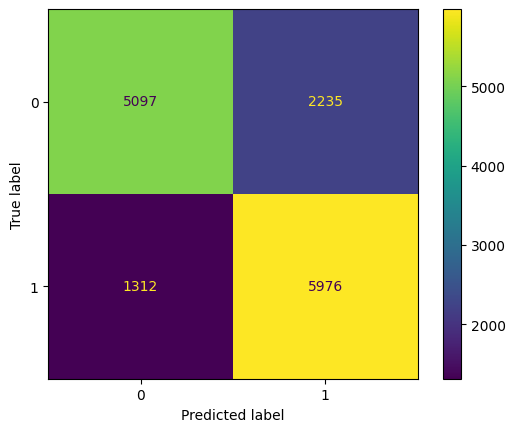

In [46]:
#ConfusionMatrixDisplay(dtree,X_test,y_test)
ConfusionMatrixDisplay.from_estimator(dtree, X_test, y_test)

In [47]:
dtree_tp = 5976
dtree_tn = 5097
dtree_fp = 2235
dtree_fn = 1312

**Get the accuracy, precision, recall and specificity**

In [48]:
splitter = ['best']

criterion = ['gini']
ccp_alphas = [10, 1.0, 0.1, 0.01]
grid = dict(splitter=splitter,criterion=criterion,ccp_alpha=ccp_alphas)

dtree_grid = GridSearchCV(dtree, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
dtree_cv_res = dtree_grid.cv_results_

dtree_mean_fit_time = dtree_cv_res['mean_fit_time'][0]

print("Mean Fit Time: ", dtree_mean_fit_time)

dtree_grid_score_train = dtree_grid.score(X_train, y_train)
dtree_grid_score_test = dtree_grid.score(X_test, y_test)
print("LogReg Train Score:", dtree_grid_score_train)
print("LogReg Test Score:", dtree_grid_score_test)
print(" ")


dtree_acc = (dtree_tp+dtree_tn)/(dtree_tp + dtree_tn + dtree_fp + dtree_fn)*100
dtree_pre = (dtree_tp)/(dtree_tp + dtree_fp)*100
dtree_rec = (dtree_tp)/(dtree_tp + dtree_fn)*100
dtree_spe = (dtree_tn)/(dtree_tn + dtree_fp)*100


print("Accuracy = \t", "{:.10f}".format(dtree_acc))
print("Precision = \t", "{:.10f}".format(dtree_pre))
print("Recall = \t", "{:.10f}".format(dtree_rec))
print("Specificity = \t", "{:.10f}".format(dtree_spe))
print(" ")
print("Train MSE:", dtree_train_mse)
print("Test MSE:", dtree_test_mse)

Mean Fit Time:  0.08553047180175781
LogReg Train Score: 0.5916102332580888
LogReg Test Score: 0.5898084815321477
 
Accuracy = 	 75.7387140903
Precision = 	 72.7804165144
Recall = 	 81.9978046103
Specificity = 	 69.5171849427
 
Train MSE: 0.18694849168889802
Test MSE: 0.2426128590971272


**Get the feature importance using the permutation importance**

In [49]:
r = permutation_importance(dtree_grid, X_test, y_test, n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.091696
0,age,0.000000
1,job,0.000000
2,marital,0.000000
3,education,0.000000
5,housing,0.000000
6,loan,0.000000


### **Explore: KNearestNeighbor Classifier**

In [50]:
from sklearn.neighbors import KNeighborsClassifier
start = time.time()
knn = KNeighborsClassifier().fit(X_train, y_train)
stop = time.time()
knn_train_time = stop - start

**Compute the Train and Test MSEs**

In [51]:
knn_train_preds = knn.predict(X_train)
knn_test_preds = knn.predict(X_test)

print('Classification report for balanced classes \n',classification_report(y_test,knn_test_preds))


knn_test_mse = mean_squared_error(knn_test_preds, y_test)
knn_train_mse = mean_squared_error(knn_train_preds, y_train)

print("KNN Train MSE:", knn_train_mse)
print("KNN Test MSE:", knn_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.75      0.66      0.70      7332
           1       0.70      0.78      0.74      7288

    accuracy                           0.72     14620
   macro avg       0.72      0.72      0.72     14620
weighted avg       0.72      0.72      0.72     14620

KNN Train MSE: 0.23780696354059785
KNN Test MSE: 0.27879616963064296


In [52]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

**Plot the confusion matrix**

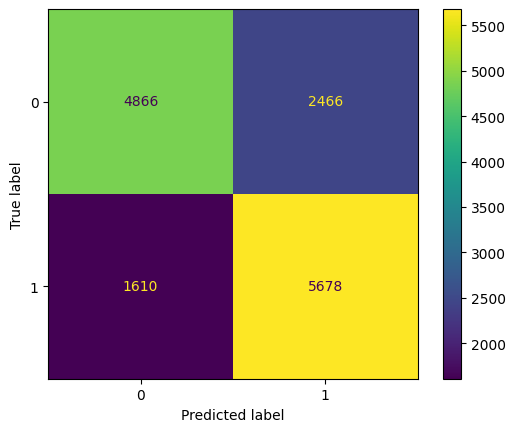

In [53]:
#plot_confusion_matrix(knn,X_test,y_test)
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

In [54]:
knn_tp = 5678
knn_tn = 4866
knn_fp = 2466
knn_fn = 1610

**Compute the accuracy, precision, recall and specificity**

In [55]:
leaf_size = [30,20,10]

metric = ['minkowski']
n_neighbors = [10, 5, 3, 2]
grid = dict(leaf_size=leaf_size,metric=metric,n_neighbors=n_neighbors)

knn_grid = GridSearchCV(knn, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X_train, y_train)
knn_cv_res = knn_grid.cv_results_

knn_mean_fit_time = knn_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", knn_mean_fit_time)

knn_grid_score_train = knn_grid.score(X_train, y_train)
knn_grid_score_test = knn_grid.score(X_test, y_test)
print("KNN Train Score:", knn_grid_score_train)
print("KNN Test Score:", knn_grid_score_test)
print(" ")



knn_acc = (knn_tp + knn_tn)/(knn_tp + knn_tn + knn_fp + knn_fn)*100
knn_pre = (knn_tp)/(knn_tp + knn_fp)*100
knn_rec = (knn_tp)/(knn_tp + knn_fn)*100
knn_spe = (knn_tn)/(knn_tn + knn_fp)*100


print("Accuracy = \t", "{:.10f}".format(knn_acc))
print("Precision = \t", "{:.10f}".format(knn_pre))
print("Recall = \t", "{:.10f}".format(knn_rec))
print("Specificity = \t", "{:.10f}".format(knn_spe))
print(" ")
print("Train MSE:", knn_train_mse)
print("Test MSE:", knn_test_mse)


Mean Fit Time:  0.01785440444946289
KNN Train Score: 0.7621930364594022
KNN Test Score: 0.7212038303693571
 
Accuracy = 	 72.1203830369
Precision = 	 69.7200392927
Recall = 	 77.9088913282
Specificity = 	 66.3666121113
 
Train MSE: 0.23780696354059785
Test MSE: 0.27879616963064296


**Compute the feature importance using the permutation importance**

In [56]:
r = permutation_importance(knn_grid, X_test[:400], y_test[:400], n_repeats = 10, random_state = 42)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
0,age,0.19025
1,job,0.14150
3,education,0.11250
5,housing,0.07350
2,marital,0.06750
6,loan,0.03175
4,default,0.02300


### **Explore: Support Vector Machines**

In [57]:
X2 = X[:4000]
y2 = y[:4000]

X2, y2 = oversample.fit_resample(X2, y2)

In [58]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, test_size = 0.10)

In [59]:
from sklearn.svm import SVC

start = time.time()
svc = SVC().fit(X2_train, y2_train)
stop = time.time()
svc_train_time = stop - start

**Compute the Train and Test MSEs**

In [60]:
svc_train_preds = svc.predict(X2_train)
svc_test_preds = svc.predict(X2_test)

print('Classification report for balanced classes \n',classification_report(y2_test,svc_test_preds))


svc_test_mse = mean_squared_error(svc_test_preds, y2_test)
svc_train_mse = mean_squared_error(svc_train_preds, y2_train)

print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Classification report for balanced classes 
               precision    recall  f1-score   support

           0       0.64      0.52      0.57       405
           1       0.57      0.68      0.62       373

    accuracy                           0.60       778
   macro avg       0.60      0.60      0.59       778
weighted avg       0.60      0.60      0.59       778

SVC Train MSE: 0.3851428571428571
SVC Test MSE: 0.40488431876606684


In [61]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

**Plot the confusion matrix**

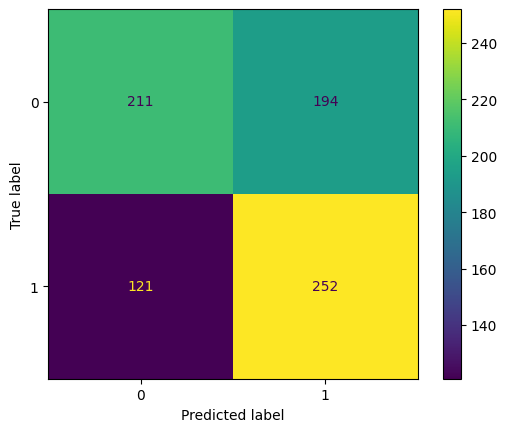

In [69]:
# plot_confusion_matrix(svc,X2_test,y2_test)
ConfusionMatrixDisplay.from_estimator(svc, X2_test, y2_test)

In [70]:
svc_tp = 252
svc_tn = 211
svc_fp = 194
svc_fn = 121

**Compute the accuracy, precision, recall and specificity**

In [76]:
kernel = ['rbf']

decision_function_shape = ['ovr']
c_values = [10, 1.0, 0.1, 0.01]
grid = dict(kernel=kernel,decision_function_shape=decision_function_shape,C=c_values)

svc_grid = GridSearchCV(svc, param_grid=grid, n_jobs=-1, scoring='accuracy',error_score=0).fit(X2_train, y2_train)
svc_cv_res = svc_grid.cv_results_

svc_mean_fit_time = svc_cv_res['mean_fit_time'][0]
print("Mean Fit Time: ", svc_mean_fit_time)

svc_grid_score_train = svc_grid.score(X2_train, y2_train)
svc_grid_score_test = svc_grid.score(X2_test, y2_test)
print("LogReg Train Score:", svc_grid_score_train)
print("LogReg Test Score:", svc_grid_score_test)
print(" ")


svc_acc = (svc_tp + svc_tn)/(svc_tp + svc_tn + svc_fp + svc_fn)*100
svc_pre = (svc_tp)/(svc_tp + svc_fp)*100
svc_rec = (svc_tp)/(svc_tp + svc_fn)*100
svc_spe = (svc_tn)/(svc_tn + svc_fp)*100


print("Accuracy = \t", "{:.10f}".format(svc_acc))
print("Precision = \t", "{:.10f}".format(svc_pre))
print("Recall = \t", "{:.10f}".format(svc_rec))
print("Specificity = \t", "{:.10f}".format(svc_spe))
print(" ")
print("SVC Train MSE:", svc_train_mse)
print("SVC Test MSE:", svc_test_mse)

Mean Fit Time:  0.4273219585418701
LogReg Train Score: 0.6335714285714286
LogReg Test Score: 0.6323907455012854
 
Accuracy = 	 59.5115681234
Precision = 	 56.5022421525
Recall = 	 67.5603217158
Specificity = 	 52.0987654321
 
SVC Train MSE: 0.3851428571428571
SVC Test MSE: 0.40488431876606684


**Compute feature importance using the permutation importance**

In [77]:
r = permutation_importance(svc_grid, X2_test[:100], y2_test[:100], n_repeats = 10, random_state = 123)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
4,default,0.099
0,age,0.004
1,job,0.004
3,education,0.000
5,housing,-0.002
2,marital,-0.009
6,loan,-0.009


#### **Data Table of Values**

In [78]:
val_df = pd.DataFrame(columns = ['Model','Train Time', 'Train Score','Test Score','Mean fit time', 'Accuracy', 'Precision', 'Recall', 'Specificity', 'Train MSE', 'Test MSE'])

In [79]:
val_df.loc[len(val_df.index)] = ['Logistic Regression', logreg_train_time, logreg_grid_score_train, logreg_grid_score_test, logreg_mean_fit_time, logreg_acc, logreg_pre, logreg_rec, logreg_spe, train_mse, test_mse] 
val_df.loc[len(val_df.index)] = ['Decision Tree', dtree_train_time, dtree_grid_score_train, dtree_grid_score_test, dtree_mean_fit_time, dtree_acc, dtree_pre, dtree_rec, dtree_spe, dtree_train_mse, dtree_test_mse]
val_df.loc[len(val_df.index)] = ['KNearestNeighbors', knn_train_time, knn_grid_score_train, knn_grid_score_test, knn_mean_fit_time, knn_acc, knn_pre, knn_rec, knn_spe, knn_train_mse, knn_test_mse]
val_df.loc[len(val_df.index)] = ['Support Vector Machine', svc_train_time, svc_grid_score_train, svc_grid_score_test, svc_mean_fit_time, svc_acc, svc_pre, svc_rec, svc_spe, svc_train_mse, svc_test_mse]


In [80]:
val_df

,Model,Train Time,Train Score,Test Score,Mean fit time,Accuracy,Precision,Recall,Specificity,Train MSE,Test MSE
0,Logistic Regression,0.082053,0.597134,0.591040,0.041876,59.274966,56.065842,84.591109,34.110747,0.403088,0.407250
1,Decision Tree,0.085812,0.591610,0.589808,0.085530,75.738714,72.780417,81.997805,69.517185,0.186948,0.242613
2,KNearestNeighbors,0.036435,0.762193,0.721204,0.017854,72.120383,69.720039,77.908891,66.366612,0.237807,0.278796
3,Support Vector Machine,0.583368,0.633571,0.632391,0.427322,59.511568,56.502242,67.560322,52.098765,0.385143,0.404884


### **Report**

The Analysis of the Logistic Regress, Decision Tree Classifier, KNeighborsClassifier and the Support Vector Machines was performed according to the following criteria
1. Imbalance Class Handling
2. Model Training Speed
3. Interpretable Results

Other criteria observed include
1. Accuracy
2. Precision
3. Recall
4. Specificity
5. Mean Squared Error

- **Logistic Regression Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is moderately low at 0.082s
    - Train Score performs slightly better than the Test Score
    - Accuracy and Specificity are not too high at 59. and 34.
    - Precision is low at 56.%
    - Recall is high at 85.%
    - Train and Test MSEs are relatively equal at .40
  
- **Decision Tree Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is moderately high at 0.085s
    - Accuracy and Specificity are very high at 75.7% and 69.5% respectively
    - Train Score at .59 performs slightly better than the Test Score  at .58
    - Precision is high at 72.7%
    - Recall is low at 82%
    - However, the Decision Tree Classifier appears to overfit as Train MSE(.1869) is lower than Test MSE (.2426)

- **KNearest Neighbors Classifier**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is high at 0.036s
    - Accuracy and Specificity are very high at 72% and 66% respectively
    - Train Score (.24) is slightly lower than the Test Score (.28)
    - Precision is high at 69.7%
    - Recall is low at 77.9%
    - However, the KNNeighbors Classifier appears to slightly overfit since Test MSE is higher than Train MSE
      
- **Support Vector Machine**
    - SMOTE was used to handle imbalanced classes
    - Speed of Training is least at .58s
    - Accuracy and Specificity is high at 59.51% and 52.09% respectively
    - Test Score (.632) is slightly lower than Train Score (.633)
    - Precision is 56.50.%
    - Recall is high at 67.56.%
    - Train and Test MSE are relatively equal


### **Select Best Model: K-Nearest Neighbors**
Based on the provided metrics, the K-Nearest Neighbors (KNN) model appears to be the most suitable choice. Here's an analysis of the key metrics:

Test Score (Accuracy): KNN achieved approximately 72.12%, which is higher than the other models.

Precision: At 69.72%, KNN demonstrates a good balance between true positive predictions and false positives.

Recall: With a recall of 77.91%, KNN effectively identifies actual positive cases.

Specificity: KNN has a specificity of 66.37%, indicating its ability to correctly identify negative cases.

Train and Test Mean Squared Error (MSE): KNN shows moderate MSE values, suggesting reasonable prediction errors.

While the Logistic Regression model has a slightly lower test score and precision, it exhibits higher specificity. The Decision Tree model shows higher accuracy but may be prone to overfitting, as indicated by the significant difference between train and test scores. The Support Vector Machine (SVM) model has comparable metrics but requires longer training time.

Considering the balance between accuracy, precision, recall, and training time, K-Nearest Neighbors stands out as the best model among the options evaluated.

## **Findings**

### **Solution 1**
- The data represents 17 marketing campaigns

### **The Business Objective**
- The business objective is to predict if the client will subscribe (yes/no) a term deposit (variable y).

### **Findings**
- Age, Loan and default strongly determines if a client will subscribe a term deposit
- Customer's Housing, Marital Status, job and education play very little role in determining if a client will subscribe a term deposit

### **Recommendation**
- Focus on select customer age group for instance certain age group of customers are more likely to subscribe to a term deposit
- Focus on customers who had previous loan as they are more likely to subscribe
- Avoid Customers who have defaulted on a credit before since they pose a high risk
- Customers with housing are less likely to subscribe to a term deposit